In [3]:
import numpy as np
import subprocess
from mpl_toolkits import mplot3d
import ipympl
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from tabulate import tabulate
from tqdm import tqdm

Lets draw time (N) for square matrix

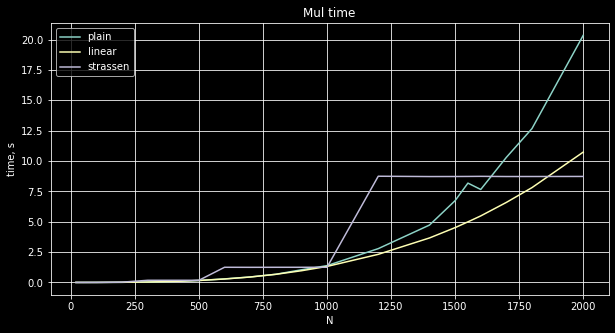

In [5]:
num_algos = 3
num_threads = 16
algos = []
algos.append ("plain")
algos.append ("linear")
algos.append ("strassen")

Ns = np.array ((20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1500, 1550, 1600, 1700, 1800, 2000))
num_points = Ns.shape[0]
times = np.zeros ((num_algos, num_points))

for i in range(0, num_points):
    result = subprocess.run (["./matmul_test", "{0}".format (Ns[i]), "{0}".format (Ns[i]), "{0}".format (num_threads)], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])

plt.figure(figsize=(14, 7))
#plt.yscale('log')
#plt.xscale('log')
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("N")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (Ns, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

Lets draw time, speedup and efficiency (num_threads) for small square matrix (all 3 matrix L1 fit on all cpus)

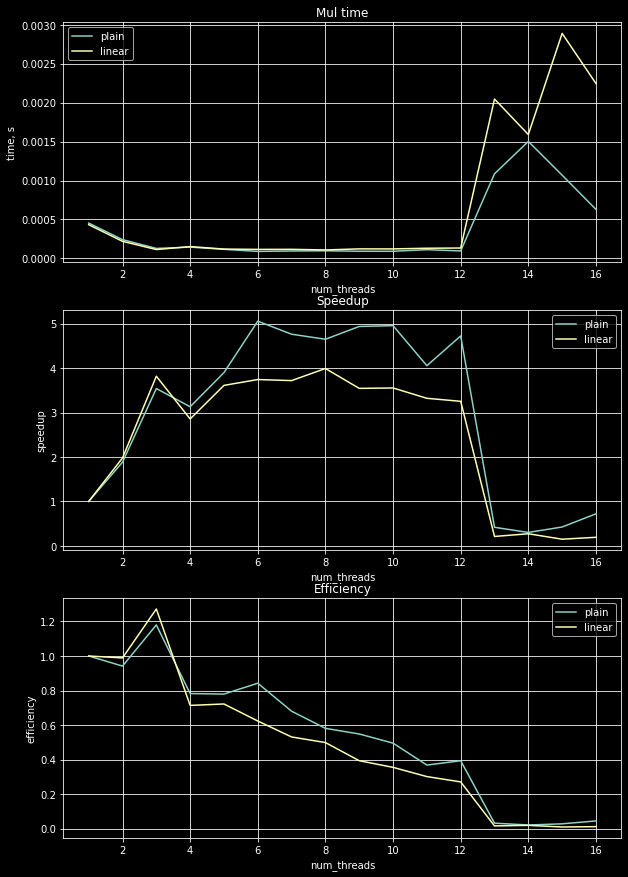

In [ ]:
N = 70
N_THR = 16
num_threads = np.arange (1, N_THR + 1, 1)
times = np.zeros ((num_algos, num_threads.shape[0]))

for i in range (0, num_threads.shape[0]):
    result = subprocess.run (["./matmul_test", "{0}".format (N), "{0}".format (N), "{0}".format (num_threads[i])], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])

plt.figure(figsize=(10, 15))

plt.subplot (311)
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("num_threads")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (312)
plt.grid ()
plt.title ("Speedup")
plt.xlabel ("num_threads")
plt.ylabel ("speedup")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (313)
plt.grid ()
plt.title ("Efficiency")
plt.xlabel ("num_threads")
plt.ylabel ("efficiency")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i] / num_threads, 'C{0}'.format (i), label = algos[i])
plt.legend ()

Lets draw time, speedup and efficiency (num_threads) for small square matrix (all 3 matrix L2 fit on all cpus)

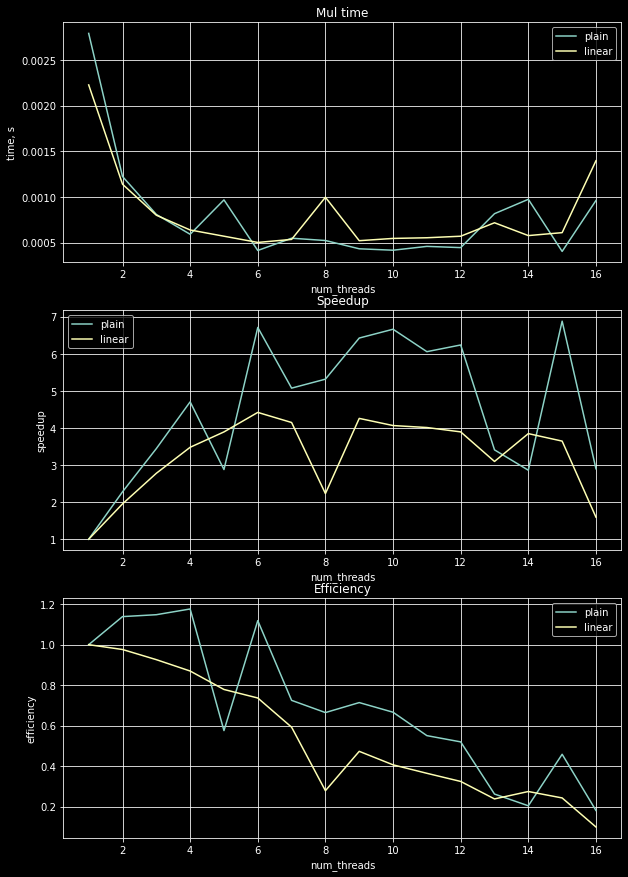

In [ ]:
N = 140

for i in range (0, num_threads.shape[0]):
    result = subprocess.run (["./matmul_test", "{0}".format (N), "{0}".format (N), "{0}".format (num_threads[i])], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])

plt.figure(figsize=(10, 15))

plt.subplot (311)
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("num_threads")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (312)
plt.grid ()
plt.title ("Speedup")
plt.xlabel ("num_threads")
plt.ylabel ("speedup")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (313)
plt.grid ()
plt.title ("Efficiency")
plt.xlabel ("num_threads")
plt.ylabel ("efficiency")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i] / num_threads, 'C{0}'.format (i), label = algos[i])
plt.legend ()

Lets draw time, speedup and efficiency (num_threads) for small square matrix (all 3 matrix L3 fit)

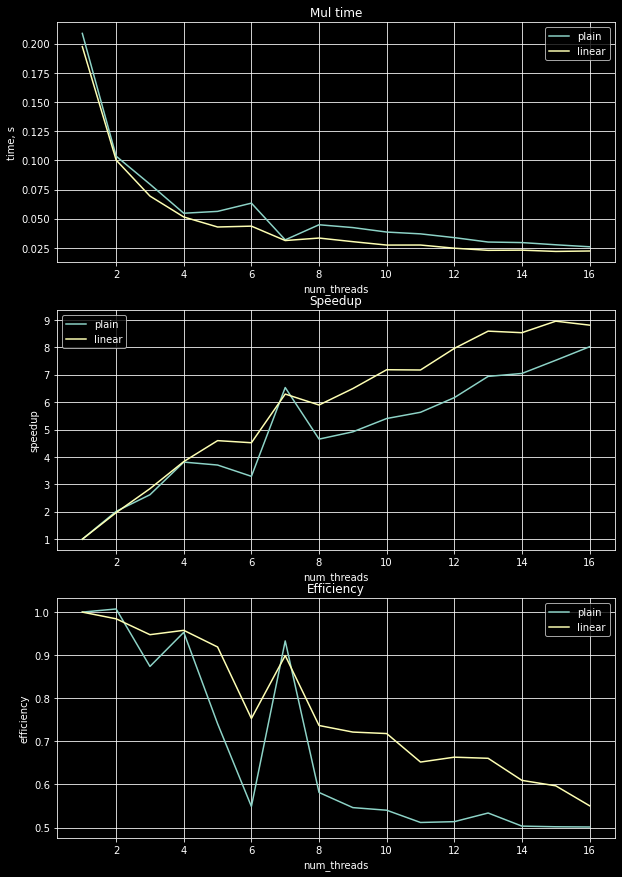

In [ ]:
N = 620

for i in range (0, num_threads.shape[0]):
    result = subprocess.run (["./matmul_test", "{0}".format (N), "{0}".format (N), "{0}".format (num_threads[i])], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])

plt.figure(figsize=(10, 15))

plt.subplot (311)
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("num_threads")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (312)
plt.grid ()
plt.title ("Speedup")
plt.xlabel ("num_threads")
plt.ylabel ("speedup")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (313)
plt.grid ()
plt.title ("Efficiency")
plt.xlabel ("num_threads")
plt.ylabel ("efficiency")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i] / num_threads, 'C{0}'.format (i), label = algos[i])
plt.legend ()

Lets draw time, speedup and efficiency (num_threads) for very huge square matrix (256MB each)

In [ ]:
'''
N = 5800

for i in range (0, num_threads.shape[0]):
    result = subprocess.run (["./matmul_test", "{0}".format (N), "{0}".format (N), "{0}".format (num_threads[i])], capture_output=True, text=True)
    res_split = result.stdout.split ()
    for j in range (0, num_algos):
        times[j][i] = np.double(res_split[j])

plt.figure(figsize=(10, 15))

plt.subplot (311)
plt.grid ()
plt.title ("Mul time")
plt.xlabel ("num_threads")
plt.ylabel ("time, s")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (312)
plt.grid ()
plt.title ("Speedup")
plt.xlabel ("num_threads")
plt.ylabel ("speedup")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i], 'C{0}'.format (i), label = algos[i])
plt.legend ()

plt.subplot (313)
plt.grid ()
plt.title ("Efficiency")
plt.xlabel ("num_threads")
plt.ylabel ("efficiency")
for i in range(0, num_algos):
    plt.plot (num_threads, times[i][0] / times[i] / num_threads, 'C{0}'.format (i), label = algos[i])
plt.legend ()
'''

'\nN = 5800\n\nfor i in range (0, num_threads.shape[0]):\n    result = subprocess.run (["./matmul_test", "{0}".format (N), "{0}".format (N), "{0}".format (num_threads[i])], capture_output=True, text=True)\n    res_split = result.stdout.split ()\n    for j in range (0, num_algos):\n        times[j][i] = np.double(res_split[j])\n\nplt.figure(figsize=(10, 15))\n\nplt.subplot (311)\nplt.grid ()\nplt.title ("Mul time")\nplt.xlabel ("num_threads")\nplt.ylabel ("time, s")\nfor i in range(0, num_algos):\n    plt.plot (num_threads, times[i], \'C{0}\'.format (i), label = algos[i])\nplt.legend ()\n\nplt.subplot (312)\nplt.grid ()\nplt.title ("Speedup")\nplt.xlabel ("num_threads")\nplt.ylabel ("speedup")\nfor i in range(0, num_algos):\n    plt.plot (num_threads, times[i][0] / times[i], \'C{0}\'.format (i), label = algos[i])\nplt.legend ()\n\nplt.subplot (313)\nplt.grid ()\nplt.title ("Efficiency")\nplt.xlabel ("num_threads")\nplt.ylabel ("efficiency")\nfor i in range(0, num_algos):\n    plt.plot (